# Introduction to neural network classification with Tensorflow
**Classification:** Is where  you try to classify something as one thing or another.
1. Binary Classification
2. Multiple Classification
3. Multilabel Classification



# Creating data to view and fit


In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy,BinaryCrossentropy

2023-01-09 14:20:37.360437: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-09 14:20:37.360476: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-09 14:20:39.473619: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-09 14:20:39.474473: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-09 14:20:39.474495: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [1]:
from sklearn.datasets import make_circles

#make 100 examples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [2]:
#check our features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#check labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

# Our data is a littel hard to understand now.Lets Visualize it !


In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


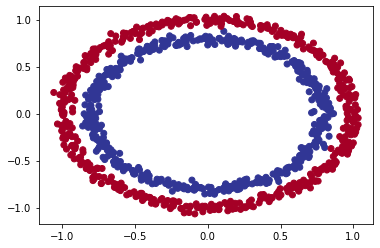

In [5]:
#visualise with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

## Input & Output  shapes


In [6]:
#check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [7]:
#how many samples we're working  with
len(X),len(y)

(1000, 1000)

In [8]:
#view the first examples of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

# Steps in modelling


The steps in modelling with TensorFlow are :
1. Create or import a model
2. Compile the model
3. Fit the model 
4. Evaluate the model
5. Tweak
6. Evalute
.
.
.

In [33]:
import tensorflow as tf
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalCrossentropy,BinaryCrossentropy

In [41]:
#set random seed
tf.random.set_seed(42)

model=tf.keras.Sequential([
    Dense(units=1)
])

#compile it
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"]
             )


#fit model
model.fit(X,
          y,
          epochs=5
)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 4.2892 - accuracy: 0.4140
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 4.2002 - accuracy: 0.4120
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0947 - accuracy: 0.4200
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 4.0121 - accuracy: 0.4390
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 3.9494 - accuracy: 0.4460


In [42]:
#improving model by training for longer
model.fit(X,y,epochs=200,verbose=0)

In [43]:
model.evaluate(X,y)#not right to evelaute with trainning data but just for experimental sake


32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.4630


[0.6931546926498413, 0.46299999952316284]

since we're working on binary classification problem and our model is getting around ~50% accuracy .. it's performing as if it's guessing.


So let's step thing up a notch and add an extra layer


#model 1

In [45]:
#set random seed
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    Dense(units=1),
    Dense(units=1)
])

#compile it
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["accuracy"]
             )


#fit model
model_1.fit(X,
          y,
          epochs=100
)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.9135 - accuracy: 0.4750
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.5261 - accuracy: 0.5050
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7124 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.4990
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6953 - accuracy: 0.5070
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.4690
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4860
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5040
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4950
Epoch 85/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4720
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4960
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4840
Epoch 88/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6951 - accuracy: 0.4770
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4860
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5070
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4960
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4990
Epoch 93/100


In [46]:
model_1.evaluate(X,y) #Again not right to evaluate on the same trainning data

32/32 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6938053369522095, 0.5]

The model seems to still be around a 50% accuracy so we still have to tweak
it 

# model 2

In [14]:
#seed
tf.random.set_seed(42)

#create model
model_2 = tf.keras.Sequential([
    Dense(units=1),
    Dense(units=1),
    Dense(units=1)
    
])


#compile it
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
            

)

# Fit MODEL
model_2.fit(X,
           y,
           epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 3ms/step - loss: 5.3073 - accuracy: 0.4780
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 4.8312 - accuracy: 0.4740
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 4.6459 - accuracy: 0.4760
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 4.6139 - accuracy: 0.4730
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 4.6105 - accuracy: 0.4730
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 4.6086 - accuracy: 0.4730
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 4.6065 - accuracy: 0.4730
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 4.6047 - accuracy: 0.4730
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 4.6026 - accuracy: 0.4730
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 4.6008 - accuracy: 0.4740


# Model 3

In [18]:
tf.random.set_seed(42)

#Create model
model_3=tf.keras.Sequential([
    Dense(units=10,activation='relu'),
    Dense(units=5,activation='relu')
    
])

#compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                

)

#fit model
History = model_3.fit(X,
                     y,
                     epochs=10)

Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 5.8032 - accuracy: 0.4440
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 5.0505 - accuracy: 0.4280
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 4.0957 - accuracy: 0.4080
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 3.5849 - accuracy: 0.3900
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 3.2343 - accuracy: 0.3750
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 3.0482 - accuracy: 0.3770
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 2.8166 - accuracy: 0.3880
Epoch 8/10
32/32 [==============================] - 0s 2ms/step - loss: 2.4730 - accuracy: 0.3980
Epoch 9/10
32/32 [==============================] - 0s 2ms/step - loss: 2.0534 - accuracy: 0.4230
Epoch 10/10
32/32 [==============================] - 0s 2ms/step - loss: 1.6788 - accuracy: 0.4290


Text(0.5, 0, 'epochs')

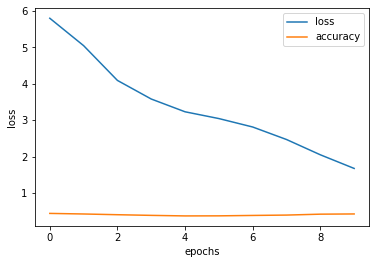

In [24]:
# PLOT HISTORY (also know as a loss curve or a training curve)
pd.DataFrame(History.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [30]:
X.shape,y.shape

((1000, 2), (1000,))

In [34]:
model_3.evaluate(X,y)#not right to evelaute with the same training data


32/32 [==============================] - 0s 2ms/step - loss: 1.4610 - accuracy: 0.4370


[1.4610002040863037, 0.43700000643730164]

# Model 4

In [36]:
tf.random.set_seed(42)

#Create model
model_4=tf.keras.Sequential([
    Dense(units=10,activation='relu'),
    Dense(units=5,activation='relu')
    
])

#compile model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
history=model_4.fit(X,
            y,
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.7837 - accuracy: 0.1570
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1.5004 - accuracy: 0.0730
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1537 - accuracy: 0.0650
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7899 - accuracy: 0.0620
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7699 - accuracy: 0.0700
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7593 - accuracy: 0.0830
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7522 - accuracy: 0.0900
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7468 - accuracy: 0.0900
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7420 - accuracy: 0.0910
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7379 - accuracy: 0.0940
Epoch 11/

32/32 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.2060
Epoch 84/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6814 - accuracy: 0.2060
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.2030
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.2030
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.2000
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.1950
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.1920
Epoch 90/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.1910
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.1910
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.1920
Epoch 93/100


Text(0.5, 0, 'epochs')

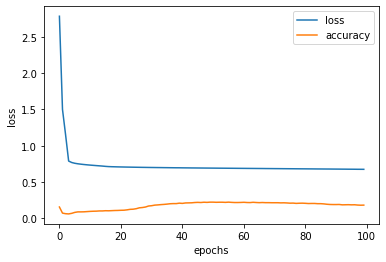

In [38]:
# PLOT HISTORY (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Model 5


In [39]:
tf.random.set_seed(42)

#Create model
model_5=tf.keras.Sequential([
    Dense(units=10,activation='relu'),
    Dense(units=5,activation='relu'),
    Dense(units=3)
    
])

#compile model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy']
                

)

#fit model
history5=model_5.fit(X,
            y,
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.3878 - accuracy: 0.4480
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7558 - accuracy: 0.3670
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7320 - accuracy: 0.3380
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7210 - accuracy: 0.2520
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7164 - accuracy: 0.2820
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7129 - accuracy: 0.2800
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.2710
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7088 - accuracy: 0.2730
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.2690
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7050 - accuracy: 0.2830
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.0740
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.0540
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5718 - accuracy: 0.0560
Epoch 86/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5670 - accuracy: 0.0540
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5624 - accuracy: 0.0490
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5575 - accuracy: 0.0410
Epoch 89/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5523 - accuracy: 0.0360
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5457 - accuracy: 0.0470
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5409 - accuracy: 0.0320
Epoch 92/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.0320
Epoch 93/100


In [40]:
model_5.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.0340


[0.47541481256484985, 0.03400000184774399]

In [41]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                30        
                                                                 
 dense_16 (Dense)            (None, 5)                 55        
                                                                 
 dense_17 (Dense)            (None, 3)                 18        
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


# visualize some of its predictions


In [43]:
model_4.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.5575855 , 0.48879993, 0.53233594, 0.48014307, 0.50843304],
       [0.54057115, 0.49328035, 0.48955518, 0.5097816 , 0.50004756],
       [0.5356757 , 0.4836638 , 0.46556613, 0.5067563 , 0.49075866],
       ...,
       [0.5274948 , 0.5122831 , 0.5270642 , 0.48329327, 0.48772445],
       [0.48783582, 0.48428446, 0.52715516, 0.47886795, 0.56750154],
       [0.38811117, 0.53384244, 0.49797046, 0.5277113 , 0.4467615 ]],
      dtype=float32)

# Visualization

 ***To viusalise our models prediction lets create a function 'plot_descision_boundary()', this funnction will:***
1. Take in a trained model , features X and label y
2. create a meshgred of the difference X values
3. make predictions accross the meshgid
4. Plot the predictions as  wel as a line  between  zones(where each unique class falls)

# useful modules
* meshgrid
* np.linspace
* np.c_


In [48]:
import numpy as np

In [55]:



def plot_decision_boundary(model,X,y):
    '''
    Plots the decision boundary created by a model prediction on X.
    '''
    #Define the axis boundaries of the  plot and create a meshgrid
    x_min,x_max= X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
    y_min,y_max= X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
    
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100))
    
    
    #create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(),yy.ravel()]#stacks 2D arr together
    
    #make predictions
    y_pred= model.predict(x_in)
    
    
    #check for multi-class
    if len(y_pred[0])>1:
        print('doing multiclass classification')
        #we have to reshape our prediction to get them ready fro plotting
        y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    #Plot tthe decision boundry
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:,1], c=y , s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(), yy.max())
    
     

In [47]:
x_min,x_max= X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
y_min,y_max= X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1

x_min,x_max,y_min,y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [57]:
y_pred=model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


In [58]:
y_pred.shape

(1000, 5)

313/313 [==============================] - 0s 914us/step
doing binary classification


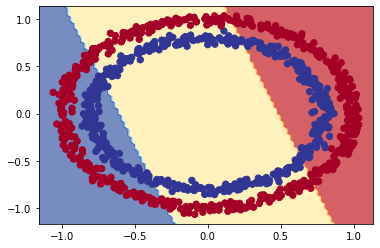

In [62]:
#check out the decisions predictions our model is making
plot_decision_boundary(model=model_2,
                       X=X,
                       y=y)